In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:98% !important; }</style>")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
# from shapely.geometry import Polygon, shape
import asf_search as asf
# from datetime import datetime, timedelta
# from typing import List
from pystac_client import Client, ItemSearch
# import geopandas as gpd
# import pandas as pd
from opera_coverage import *
from shapely.geometry import Polygon
from datetime import datetime

### Polygons of areas of interest:

Ridgecrest coordinates: Polygon([[-117.7167, 35.5909],[-117.6322, 35.5909],[-117.6322, 35.6452],[-117.7167, 35.6452],[-117.7167, 35.5909]])

Wax lake delta: Polygon([[-91.4964, 29.4641],[-91.3849, 29.4641],[-91.3849, 29.5627],[-91.4964, 29.5627],[-91.4964, 29.4641]])

Laurentides forest in Canada: Polygon([[-75.0327, 46.0832],[-74.8823, 46.0832],[-74.8823, 46.1914],[-75.0327, 46.1914],[-75.0327, 46.0832]])

In [4]:
# create shapely and geodataframe files of areas of interest
ridgecrest = Polygon([[-117.7167, 35.5909],[-117.6322, 35.5909],[-117.6322, 35.6452],[-117.7167, 35.6452],[-117.7167, 35.5909]])
waxlake = Polygon([[-91.4964, 29.4641],[-91.3849, 29.4641],[-91.3849, 29.5627],[-91.4964, 29.5627],[-91.4964, 29.4641]])
laurentides = Polygon([[-75.0327, 46.0832],[-74.8823, 46.0832],[-74.8823, 46.1914],[-75.0327, 46.1914],[-75.0327, 46.0832]])
ridgecrest_df = shape2gdf(ridgecrest, 'ridgecrest')
waxlake_df = shape2gdf(waxlake, 'waxlake')
laurentides_df = shape2gdf(laurentides, 'laurentides')

In [86]:
%%time
freq1, next_acq1, area1, master1 = get_coverage(['sentinel1','sentinel2','landsat8'],ridgecrest,[datetime(2022,1,1), datetime(2022,2,1)])


CPU times: user 461 ms, sys: 29.4 ms, total: 490 ms
Wall time: 11.4 s


/Users/angelac/opera_coverage/opera_coverage/search.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return cadence
/Users/angelac/opera_coverage/opera_coverage/search.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master = dfs[0].append(dfs[1])


In [87]:
master1

,startTime,geometry,sensor,fileID,cadence
0,2022-01-01 01:51:00+00:00,"POLYGON ((-119.51417 36.85466, -119.12637 35.2...",sentinel1,S1A_IW_SLC__1SDV_20220101T015100_20220101T0151...,NaT
1,2022-01-01 13:52:18+00:00,"POLYGON ((-116.35956 34.08510, -115.96290 35.7...",sentinel1,S1A_IW_SLC__1SDV_20220101T135218_20220101T1352...,0 days 12:01:18
2,2022-01-03 18:44:26.649000+00:00,"POLYGON ((-118.09829 35.14991, -116.89284 35.1...",sentinel2,HLS.S30.T11SMV.2022003T183749.v2.0,2 days 04:52:08.649000
3,2022-01-08 18:44:32.032000+00:00,"POLYGON ((-118.09829 35.14991, -116.89284 35.1...",sentinel2,HLS.S30.T11SMV.2022008T183741.v2.0,5 days 00:00:05.383000
4,2022-01-13 01:51:00+00:00,"POLYGON ((-119.51548 36.85461, -119.12757 35.2...",sentinel1,S1A_IW_SLC__1SDV_20220113T015100_20220113T0151...,4 days 07:06:27.968000
5,2022-01-13 13:52:18+00:00,"POLYGON ((-116.35944 34.08509, -115.96275 35.7...",sentinel1,S1A_IW_SLC__1SDV_20220113T135218_20220113T1352...,0 days 12:01:18
6,2022-01-14 18:28:09.597000+00:00,"POLYGON ((-118.09829 35.14991, -117.10661 35.1...",landsat8,HLS.L30.T11SMV.2022014T182809.v2.0,1 days 04:35:51.597000
7,2022-01-18 18:44:30.867000+00:00,"POLYGON ((-118.09829 35.14991, -116.89284 35.1...",sentinel2,HLS.S30.T11SMV.2022018T183711.v2.0,4 days 00:16:21.270000
8,2022-01-23 18:44:25.195000+00:00,"POLYGON ((-118.09829 35.14991, -116.89284 35.1...",sentinel2,HLS.S30.T11SMV.2022023T183649.v2.0,4 days 23:59:54.328000
9,2022-01-25 01:50:59+00:00,"POLYGON ((-119.51542 36.85430, -119.12750 35.2...",sentinel1,S1A_IW_SLC__1SDV_20220125T015059_20220125T0151...,1 days 07:06:33.805000


In [88]:
master1.cadence.mean()

Timedelta('2 days 11:23:05.376500')

In [42]:
freq2, next_acq2, area2, master2 = get_coverage(['sentinel1','sentinel2','landsat8'],waxlake,[datetime(2022,1,1), datetime(2022,2,1)])


/Users/angelac/opera_coverage/opera_coverage/search.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return cadence
/Users/angelac/opera_coverage/opera_coverage/search.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master = dfs[0].append(dfs[1])


In [43]:
master2

,startTime,geometry,sensor,fileID,cadence
0,2022-01-01 00:10:27+00:00,"POLYGON ((-93.34817 30.30906, -92.98476 28.677...",sentinel1,S1A_IW_SLC__1SDV_20220101T001027_20220101T0010...,NaT
1,2022-01-05 16:55:32.822000+00:00,"POLYGON ((-90.84993 28.82233, -90.82906 29.812...",sentinel2,HLS.S30.T15RXN.2022005T164701.v2.0,4 days 16:45:05.822000
2,2022-01-10 16:55:27.196000+00:00,"POLYGON ((-90.84993 28.82233, -90.82906 29.812...",sentinel2,HLS.S30.T15RXN.2022010T164649.v2.0,4 days 23:59:54.374000
3,2022-01-13 00:10:27+00:00,"POLYGON ((-93.34926 30.30864, -92.98592 28.677...",sentinel1,S1A_IW_SLC__1SDV_20220113T001027_20220113T0010...,2 days 07:14:59.804000
4,2022-01-15 16:55:31.947000+00:00,"POLYGON ((-90.84993 28.82233, -90.82906 29.812...",sentinel2,HLS.S30.T15RXN.2022015T164641.v2.0,2 days 16:45:04.947000
5,2022-01-16 16:38:29.896000+00:00,"POLYGON ((-91.07672 28.82576, -90.83072 29.735...",landsat8,HLS.L30.T15RXN.2022016T163829.v2.0,0 days 23:42:57.949000
6,2022-01-25 00:10:26+00:00,"POLYGON ((-93.34921 30.30866, -92.98589 28.677...",sentinel1,S1A_IW_SLC__1SDV_20220125T001026_20220125T0010...,8 days 07:31:56.104000
7,2022-01-30 16:55:25.306000+00:00,"POLYGON ((-90.84993 28.82233, -90.82906 29.812...",sentinel2,HLS.S30.T15RXN.2022030T164529.v2.0,5 days 16:44:59.306000


In [52]:
master2.cadence.mean()

Timedelta('4 days 05:49:16.900857142')

In [83]:
freq3, next_acq3, area3, master3 = get_coverage(['sentinel1','sentinel2','landsat8'],laurentides,[datetime(2022,1,1), datetime(2022,2,1)])


/Users/angelac/opera_coverage/opera_coverage/search.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return cadence
/Users/angelac/opera_coverage/opera_coverage/search.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master = dfs[0].append(dfs[1])


In [84]:
master3

,startTime,geometry,sensor,fileID,cadence
0,2022-01-03 16:10:18.694000+00:00,"POLYGON ((-76.28945 45.95828, -76.31456 46.946...",sentinel2,HLS.S30.T18TWS.2022003T160651.v2.0,NaT
1,2022-01-08 15:44:18.159000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",landsat8,HLS.L30.T18TVS.2022008T154418.v2.0,4 days 23:33:59.465000
2,2022-01-08 16:10:13.037000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2,HLS.S30.T18TWS.2022008T160639.v2.0,0 days 00:25:54.878000
3,2022-01-10 16:00:22.022000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2,HLS.S30.T18TWS.2022010T155631.v2.0,1 days 23:50:08.985000
4,2022-01-10 22:52:36+00:00,"POLYGON ((-76.75502 46.30980, -76.29864 44.693...",sentinel1,S1A_IW_SLC__1SDV_20220110T225236_20220110T2253...,0 days 06:52:13.978000
5,2022-01-13 16:10:17.984000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2,HLS.S30.T18TWS.2022013T160631.v2.0,2 days 17:17:41.984000
6,2022-01-15 15:50:27.751000+00:00,"POLYGON ((-74.87403 45.96548, -76.29100 45.958...",landsat8,HLS.L30.T18TVS.2022015T155027.v2.0,1 days 23:40:09.767000
7,2022-01-15 16:00:16.442000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2,HLS.S30.T18TWS.2022015T155609.v2.0,0 days 00:09:48.691000
8,2022-01-18 16:10:12.397000+00:00,"POLYGON ((-76.29100 45.95826, -76.31456 46.946...",sentinel2,HLS.S30.T18TWS.2022018T160559.v2.0,3 days 00:09:55.955000
9,2022-01-20 16:00:20.645000+00:00,"POLYGON ((-73.55749 46.94462, -73.58334 45.956...",sentinel2,HLS.S30.T18TWS.2022020T155551.v2.0,1 days 23:50:08.248000


In [85]:
master3.cadence.mean()

Timedelta('1 days 17:58:45.261875')

In [19]:
print(freq3['landsat8'])
print(next_acq3['landsat8'])
print(freq3['sentinel1'])
print(next_acq3['sentinel1'])
print(freq3['sentinel2'])
print(next_acq3['sentinel2'])

['0:00:00', '7 days, 0:06:09.592000', '0:00:00', '8 days, 23:53:45.752000', '0:00:00', '7 days, 0:06:09.381000', '0:00:00']
Time of next acquisition after 2022-02-01 00:00:00 is 2022-02-09 15:44:10.497000+00:00
['11 days, 23:59:59']
Time of next acquisition after 2022-02-01 00:00:00 is 2022-02-03 22:52:35+00:00
['0:00:04.401000', '4 days, 23:59:49.942000', '0:00:04.398000', '1 day, 23:50:04.587000', '0:00:03.261000', '3 days, 0:09:52.701000', '0:00:04.405000', '1 day, 23:49:54.053000', '0:00:03.264000', '3 days, 0:09:52.691000', '0:00:04.402000', '1 day, 23:50:03.846000', '0:00:03.266000', '3 days, 0:09:53.157000', '0:00:04.402000', '1 day, 23:49:53.480000', '0:00:03.269000', '3 days, 0:09:52.650000', '0:00:04.407000', '1 day, 23:50:05.581000', '0:00:03.264000']
Time of next acquisition after 2022-02-01 00:00:00 is 2022-02-04 16:00:15.136000+00:00


### Work in progress

<AxesSubplot:>

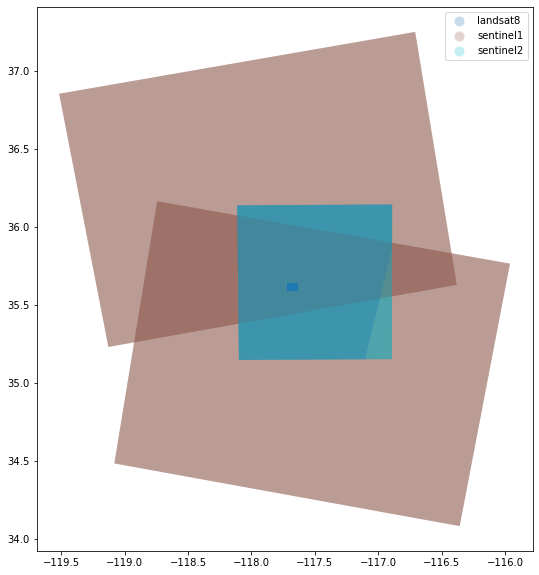

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
master1.plot(column='sensor',alpha=0.25, legend=True, ax=ax)
ridgecrest_df.plot(ax=ax)

<AxesSubplot:>

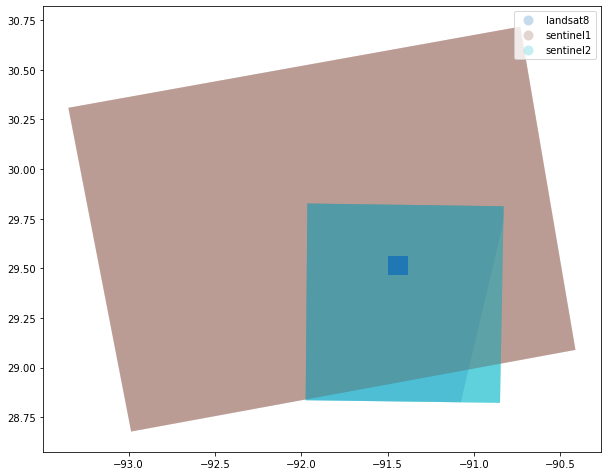

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
master2.plot(column='sensor',alpha=0.25, legend=True, ax=ax)
waxlake_df.plot(ax=ax)

<AxesSubplot:>

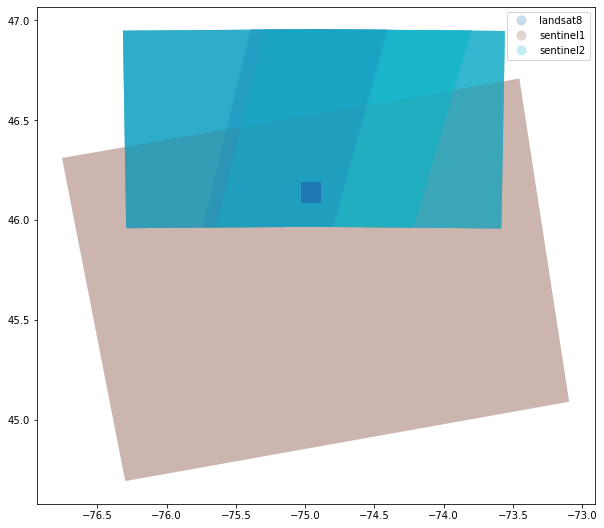

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
master3.plot(column='sensor',alpha=0.25, legend=True, ax=ax)
laurentides_df.plot(ax=ax)

In [93]:
type(master3)

geopandas.geodataframe.GeoDataFrame

### The below cells are just for reminding what format the output results have

In [ ]:
wkt = laurentides.wkt
opts = {
    'platform': asf.PLATFORM.SENTINEL1,
    'processingLevel': [asf.PRODUCT_TYPE.SLC],
    'beamMode': [asf.BEAMMODE.IW],
    'start': '2022-01-01T00:00:00Z',
    'end': '2022-02-01T23:59:59Z'
}
results = asf.search(intersectsWith=wkt,**opts)
print(len(results))

In [ ]:
sent1_forest = format_results_for_sent1(results)

In [56]:
STAC_URL = 'https://cmr.earthdata.nasa.gov/stac'
api = Client.open(f'{STAC_URL}/LPCLOUD/')
hls_collections = ['HLSS30.v2.0']
search_params = {"collections": hls_collections,
                 "bbox": [-75.0327, 46.0832, -74.8823, 46.1914], # list of xmin, ymin, xmax, ymax
                 "datetime": [datetime(2022,1,1), datetime(2022,2,1)],
                 }
search_hls = api.search(**search_params)
hls_collection = search_hls.get_all_items()
g = list(hls_collection)
# d[0].properties

In [74]:
sent2_forest = format_results_for_hls(g,'sentinel2')

In [ ]:
STAC_URL = 'https://cmr.earthdata.nasa.gov/stac'
api = Client.open(f'{STAC_URL}/LPCLOUD/')
hls_collections = ['HLSL30.v2.0']
search_params = {"collections": hls_collections,
                 "bbox": [-75.0327, 46.0832, -74.8823, 46.1914], # list of xmin, ymin, xmax, ymax
                 "datetime": [datetime(2022,1,1), datetime(2022,2,1)],
                 }
search_hls = api.search(**search_params)
hls_collection = search_hls.get_all_items()
d = list(hls_collection)

In [ ]:
land8_forest = format_results_for_hls(d,'landsat8')

In [ ]:
d[1].to_dict()

In [ ]:
shape(area1['sentinel1'])

# Visualization

In [ ]:
visual(df_dis.geometry)

In [ ]:
find_overlap(df_dis.geometry)

In [ ]:
visual(area1['sentinel1'],outline=True)

In [ ]:
visual(area1['sentinel1'])

In [ ]:
visual(area1)

In [ ]:
visual(area2)

In [ ]:
visual(area3)

### Deprecated